In [1]:

#import important libraries

import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram

## Hadamard coin


step:  1

step:  2

step:  3

step:  4

step:  5

step:  6

step:  7

step:  8

step:  9

step:  10

step:  11

step:  12

step:  13

step:  14

step:  15

step:  16

step:  17

step:  18

step:  19

step:  20

step:  21

step:  22

step:  23

step:  24

step:  25


c:\users\hassaan\appdata\local\programs\python\python37\lib\site-packages\qiskit\visualization\counts_visualization.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


done


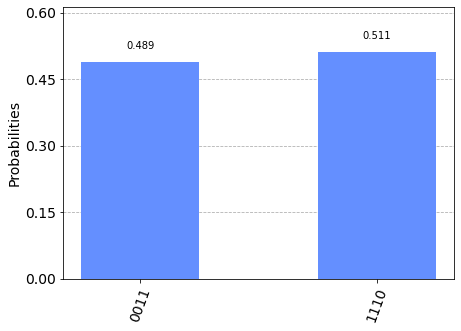

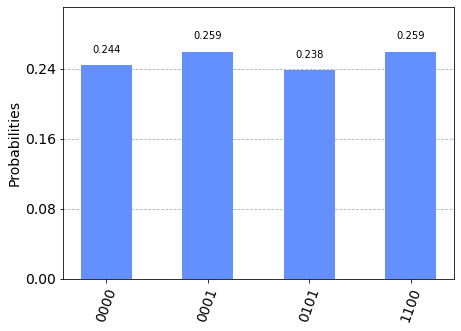

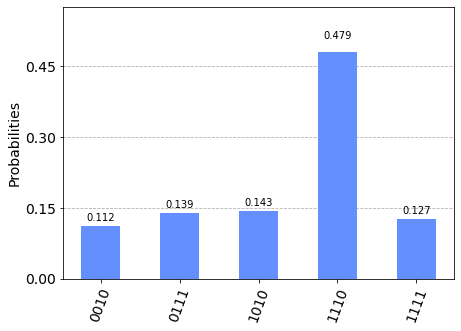

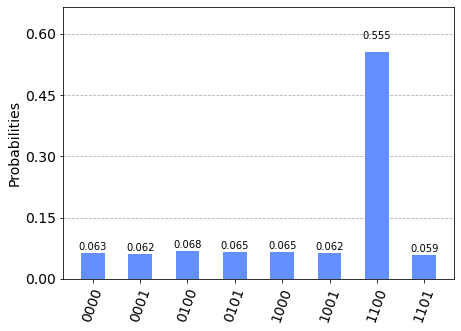

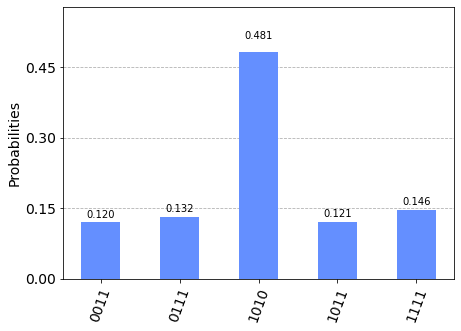

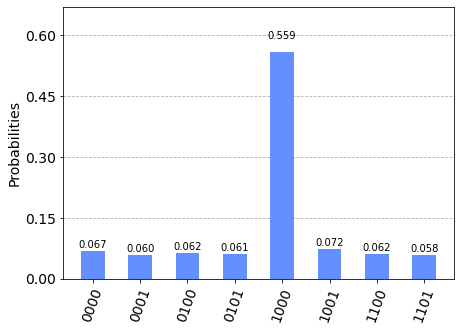

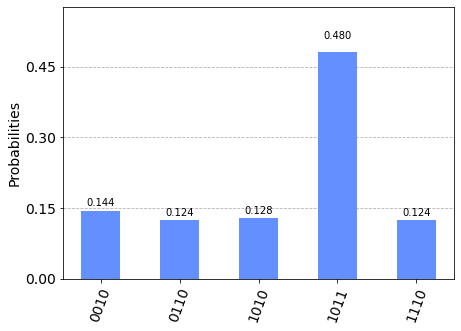

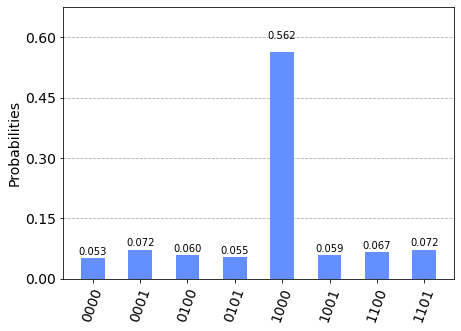

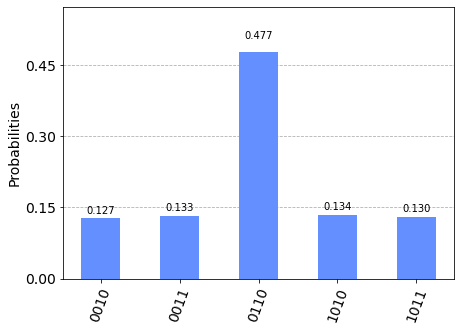

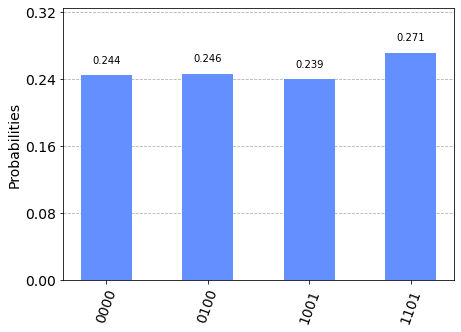

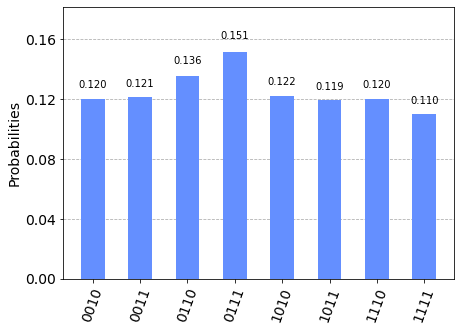

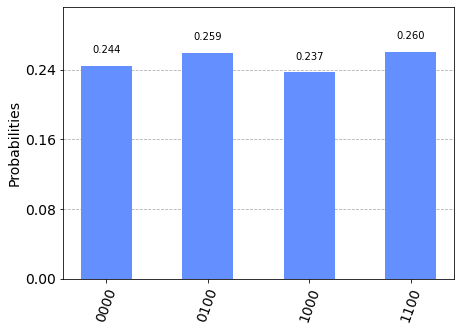

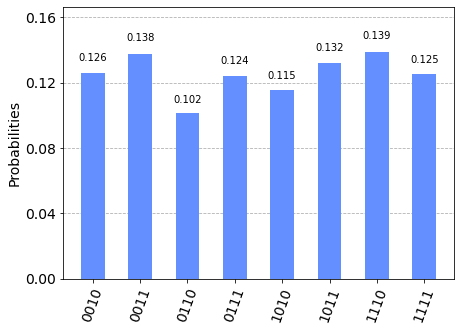

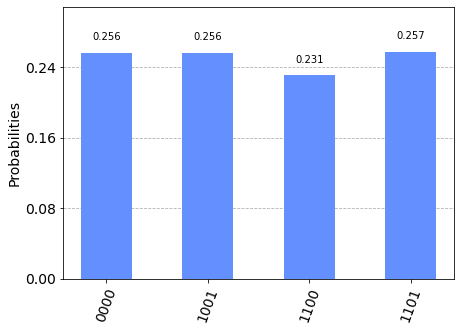

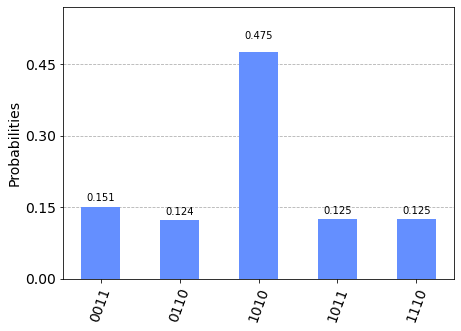

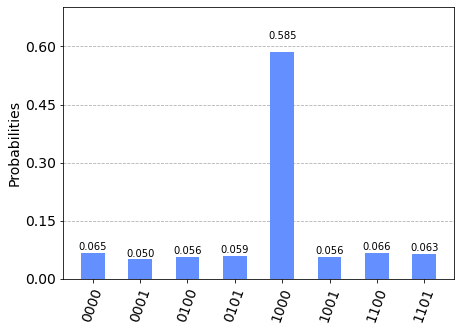

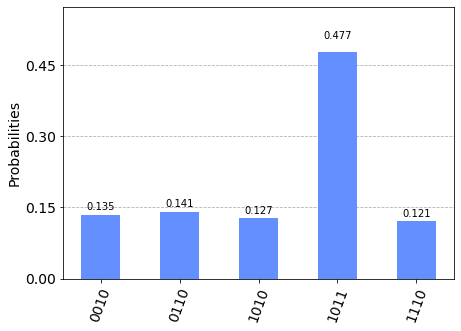

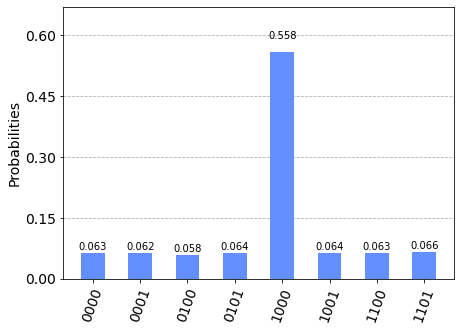

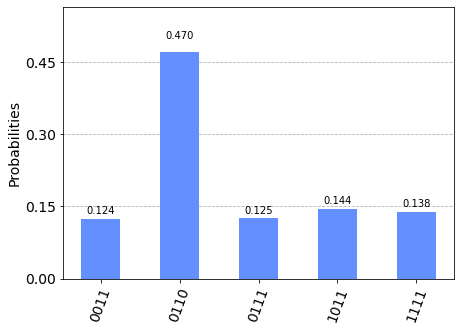

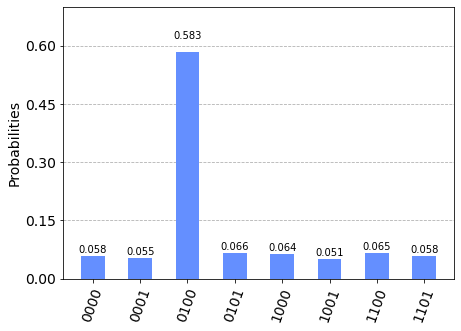

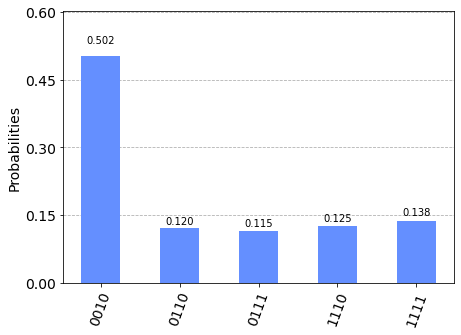

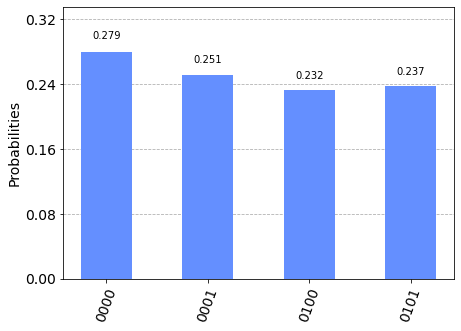

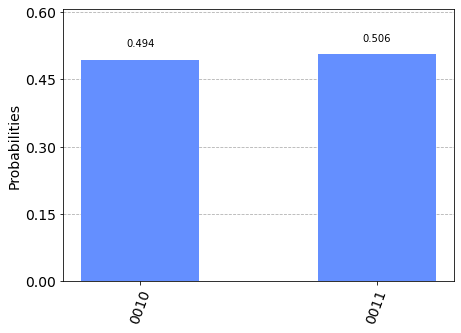

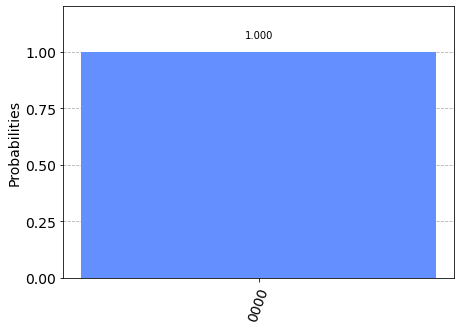

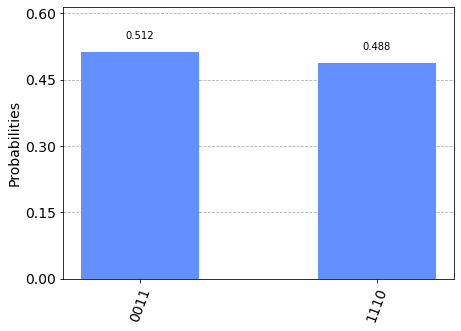

In [2]:


#discrete time quantum random walk with a hadamard coin

#coin
step = 1

for steps in range(25):
    print("\nstep: ", step)
    had=QuantumCircuit(4)
    qubits=had.qubits


    for t in range(step):
        had.h(0)
        had.barrier()
        #increment operator
        had.mct([qubits[0],qubits[1],qubits[2]], qubits[3])
        had.ccx(0,1,2)
        had.cx(0,1)
        had.barrier()
        #decrement operator
        had.x([0,1,2])
        had.mct([qubits[0],qubits[1],qubits[2]], qubits[3])
        had.ccx(0,1,2)
        had.cx(0,1)
        had.x([0,1,2])
        had.barrier()   
    had.measure_all()

    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(had)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts()
    plot_histogram(counts)
    step += 1 
    counts = 0
print("done")




A coined discrete time quantum random walk (DTQW) is described by the tensor product of a coin Hilbert space and a position Hilbert space. It takes place on the vertices of a graph. The position space is augmented by the coin space spanned by two basis states {|0>, |1>} that help move the walker in a particular direction depending on the state of the coin. The coin operator enables us to superimpose both states equally. 
There are different kinds of operators that act as coins in the DTQW and exhibit different behaviors during the walks. Therefore we chose the Grover coin and the Hadamard coin to compare during a walk. 
We chose the Hadamard gate to act as the Hadamard coin and the Grover diffusion operator to act as the Grover coin for our circuits.

## Grover coin

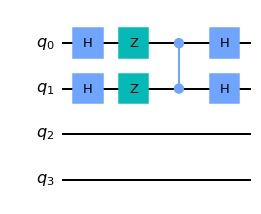

In [3]:


#discrete time quantum random walk with a grover coin 
grover = QuantumCircuit(4) 
# Coin operator
grover.h([0,1])
grover.z([0,1])
grover.cz(0,1)
grover.h([0,1])
grover.draw(output = "mpl")
grover_gate = grover.to_instruction()



It is observed that the hadamard coin shows equal probabilities of the walker traversing the walk in a particular direction as compared to the other. Whereas the grover coin does not put the walker in an equal superposition as the Hadamard coin does. Instead, one state has a much larger probability than the other states.
Therefore if we start the quantum walk in an equal superposition of all the directions and measure the grover coin space after
each iteration the resulting (classical) walk will have a
higher propensity to go back and forth on the same edge
than to switch directions.
To demonstrate this, we can run this circuit repeatedly to get approximately the same walk

In [4]:


for steps in range(2):
    print("\nstep: ", steps)
    circ=QuantumCircuit(4)

    
    for t in range(steps):
        circ.append(grover_gate,[0,1,2,3])
        circ.barrier()
        #increment operator
        circ.mct(
    [qubits[0],qubits[1],qubits[2]], qubits[3])
        circ.ccx(0,1,2)
        circ.cx(0,1)

        circ.barrier()
        #decrement operator
        circ.x([0,1,2])
        circ.mct([qubits[0],qubits[1],qubits[2]], qubits[3])
        circ.ccx(0,1,2)
        circ.cx(0,1)
        circ.x([0,1,2])
        
    circ.measure_all()

    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(circ)
    result = aer_sim.run(qobj).result()
print("done")


Simulation failed and returned the following error message:
ERROR:  [Experiment 0] AerSimulator: circuit with instructions {"instructions": {gate, barrier, measure}, "gates": {circuit-34, mcx, ccx, cx, x}} is not compatible with any of the automatic simulation methods



step:  0

step:  1
done


In [8]:
circ=QuantumCircuit(4)
circ.append(grover_gate,[0,1,2,3])
circ.barrier()
#increment operator
circ.mct(
    [qubits[0],qubits[1],qubits[2]], qubits[3])
circ.ccx(0,1,2)
circ.cx(0,1)

circ.barrier()
#decrement operator
circ.x([0,1,2])
circ.mct(
    [qubits[0],qubits[1],qubits[2]], qubits[3])
circ.ccx(0,1,2)
circ.cx(0,1)
circ.x([0,1,2])
circ.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)
circ.draw()

QiskitError: 'No counts for experiment "0"'